# Project Three

https://classroom.github.com/a/feP-p3J8

#### Set-up

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn. In future projects we will the use the MNIST data set of handwritten digits which consists of larger images (28x28 pixels) and contains more samples (>50000).

#### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 

In [3]:
data = load_digits()

In [9]:
X = data.data
y = data.target
classes = data.target_names

The dataset contains 1,797 samples, each containing 8x8 image information. The value is essentially the intenstiy of the pixel.

In [12]:
X.shape

(1797, 64)

The target in this dataset is the digit number from 0 to 9.

In [14]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Plotted below are a few of the images in the dataset.

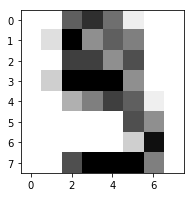

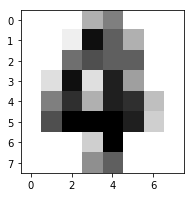

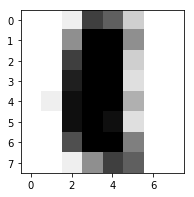

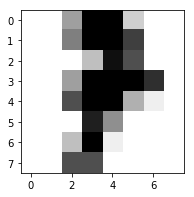

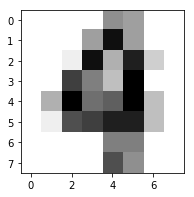

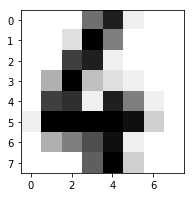

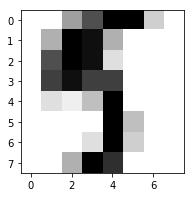

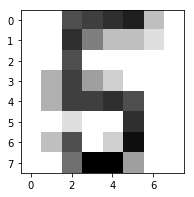

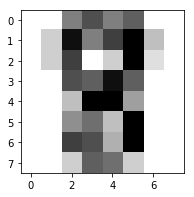

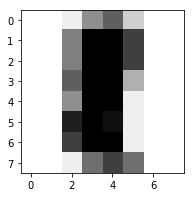

In [38]:
for i in range(10):
    i = randint(0, 1796)
    plt.figure(1, figsize=(3, 3))
    plt.imshow(data.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

### b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using 

** Principal Component Analysis (PCA)**

* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* http://scikit-learn.org/stable/modules/decomposition.html

and

** Manifold Learning ** 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
* http://scikit-learn.org/stable/modules/manifold.html


Apply on example each of PCA and Manifold Learning to the digits data set. Keep two dimensions.

In [33]:
from sklearn.decomposition import PCA

In [34]:
kpca = PCA(n_components = 2)
X_kpca = kpca.fit_transform(X)

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


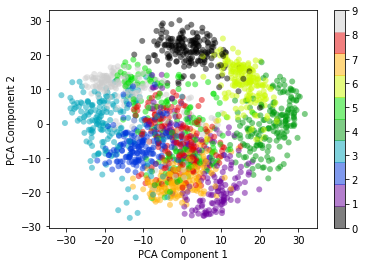

In [35]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar();
plt.show()

In [48]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


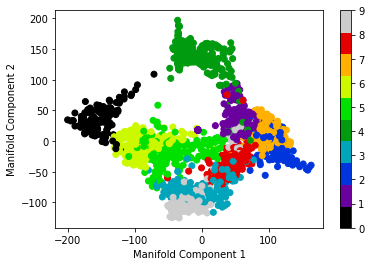

In [53]:
plt.scatter(proj[:, 0], proj[:, 1], c=data.target, cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(ticks=range(10))
plt.xlabel('Manifold Component 1')
plt.ylabel('Manifold Component 2')
plt.show()

### c) Supervised Learning

Apply one of the methods we have looked at so far for supervised learning (for example Support Vector Machines, Decision Trees and Random Forests) to the digits problem. Use model validation and parameter searches as needed. How accurate is your model? Use appropriate measures to describe the accuracy of your model.

### d) Exploration: Unsupervised Learning

This part is optional. In supervised learning we use labelled data to train or build a model. In the case of the images of handwritten digits each image is label with the (hopefully) correct digit 0..9. Unsupervised learning tries to extract the fact that there are 10 different objects (the digits 0..9) from the images without knowing the labels. Learn in the textbook about

** k-means Clustering*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

and apply some of the techiques to the digits problem.